# Evolutionary Computing - N-Queens Problem


**Goal**: Implement an Evolutionary Algorithm to solve for the N-Queens problem. Could be defined as minimization of maximization.

This assignment requires implementation of the main components of an evolutionary algorithm (i.e. *crossover*, *mutation*, *parent selection*, etc), and construction of your algorithm to solve the given problem. Try to make your EA as good performing as possible (solving also the bigger chess boards).

Please answer the `Questions` and implement coding `Tasks` by filling **PLEASE FILL IN** sections. *Documentation* of your code is also important. You can find the grading scheme in implementation cells.

  * Plagiarism is automatically checked and set to **0 points**

  * It is allowed to learn from external resources but copying is not allowed. If you use any external resource, please cite them in the comments (e.g. `# source: https://...../` (see `fitness_function`))

POINTS ARE ONLY FOR RELATIVE FEEDBACK, NOT AN ACTUAL GRADE.

**Setup**

**Install Prerequisites**

In [190]:
# Run this cell to install the required libraries
%pip install numpy matplotlib scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**Imports**

In [191]:
# Necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ranksums

# Set seed
np.random.seed(42)

**Plotting**

In [192]:
# Enables inline matplotib graphs
# %matplotlib inline
%pip install PyQt5
# Comment the line above and uncomment the lines below to have interactive plots
# WARN: may cause dependency issues
#%matplotlib qt5
#%pip install PyQt5
#plt.ion()

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [193]:
def generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2,
    stds_experiment_2,
    n_columns,
    n_queens,
):
    """This helper function generates subplots for the experiments."""
    fig, axes = plt.subplots(nrows=1, ncols=n_columns, figsize=(18, 6))

    for i in range(len(avgs_experiment_1)):
        if avgs_experiment_2 is not None:
            # Plot data for subplot 1
            axes[i].plot(avgs_experiment_2[i], label="Experiment 2", color="green")
            axes[i].fill_between(
                np.arange(len(avgs_experiment_2[i])),
                avgs_experiment_2[i] - stds_experiment_2[i],
                avgs_experiment_2[i] + stds_experiment_2[i],
                alpha=0.2,
                color="green",
            )
            axes[i].set_ylim(bottom=0)

            if n_queens:
                axes[i].set_ylim(top=n_queens[i])

        axes[i].plot(avgs_experiment_1[i], label="Experiment 1", color="blue")
        axes[i].fill_between(
            np.arange(len(avgs_experiment_1[i])),
            avgs_experiment_1[i] - stds_experiment_1[i],
            avgs_experiment_1[i] + stds_experiment_1[i],
            alpha=0.2,
            color="blue",
        )
        axes[i].set_title(labels[i])
        axes[i].set_ylim(bottom=0)
        if n_queens:
            axes[i].set_ylim(top=n_queens[i])

    # Set common labels and title
    for ax in axes:
        ax.set_xlabel("Generations")
        ax.set_ylabel("Average Best Fitness")
        ax.legend()

    plt.tight_layout()

---

## Discrete Optimization - The N-Queens Problem (5 points total)

Implement an Evolutionary Algorithm for the **n-queens problem** - finding a placement of N queens on an N by N chess board, in which no queens are attacking each other.

Below is a visualization of a solution for the n-queens problem when n = 4. Observe that none of the queens are attacking each other.

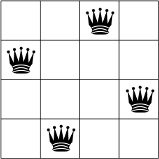


We would like to implement an EA that can find a solution for any given N by N board, by placing N queens where none of them attack each other.
It is usually better to start simple and generalize your implementation. So, let's start with the case when **N = 4**.

### **Question 1 (0-0.3 pt):**
* How do you represent a solution (a 4 queen placement on a 4x4 chess board)? In particular, specify the length of your genotype representation, what each gene (dimension) represents, and what values they can get.

**Answer:** We can represent a genotype as an array of size four, where each cell in the array represents a row of the chess board. A queen on the board can then be represented by a number between 0 and 3 within a cell, representing the column that the queen is placed in on the row that corresponds to the cell (starting the count from 0). This automatically eliminates row conflicts, as the solution places exactly one queen per row. Second, if we do not allow for duplicate numbers in the cells, we also immediately eliminate column conflicts, only leaving diagonal conflicts left to be checked or improved upon. 

### **Question 2 (0-0.2 pt):**
* Please write down an example representation and discuss what it means.

**Answer:** For example, the solution above can be represented as (2,0,3,1). In this solution, the first row has the queen in the third column,  the second row has the queen in the first column, the third row has the queen in the fourth column, and the fourth has the queen in the second column. Since the solution presented above does not have any row and column conflicts, the phenotype above can be represented by the genotype below.


### **Question 3 (0-0.2 pt):** 
* How many possible solutions can be generated in your representation?

**Answer:** In the representation, since we do not allow for duplicate numbers in the array, we have permutations of the numbers 1,2,3,4. This indicates we have $4!=24$ posible solutions, which are of course not all valid solution for the problem, but can nonetheless be generated using this notation. In general, we have $n!$ possible solutions for a board of size $n$

---

### **Task 1 (0-0.20-0.40-0.80):** 
Implementation of solution encoding, visualization and evaluation functions.

In [194]:
################################################################


# PLEASE FILL IN - how do you represent your solution? 
# The solution is represented as the purmation notation, 
#in an np.array to allow for efficient mutation and crossover operations
example_solution =np.array([2,0,3,1], dtype= int)


################################################################

Write a function below that can visualize your solution. For instance, the output may look like below, a matrix representing the 4x4 chess board where each Q indicates a queen placement and dots are empty cells. <br>
<br>
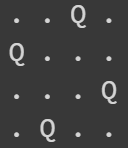


In [195]:
def visualize_solution(solution):
    """Visualize the placement of queens on the chessboard."""
    
    ################################################################
    
    #Get the number of rows and columns n and make a grid of dots
    n =len(solution)
    visual = np.full((n, n), ".", dtype=str)
    
    # For each row fill in a Q to show the column the queen is placed in
    for i,column in enumerate( solution):
        visual[i,column] = "Q"
    
    # For each row in the array, print the row connected by spaces in between (print automatically handles newline)
    for row in visual:
        print(" ".join(row))

    ################################################################

In [196]:
visualize_solution(example_solution)

. . Q .
Q . . .
. . . Q
. Q . .


Write the evaluation function to assess how good your solution is.

In [197]:
def evaluate_solution_n_queens(solution):
    """Calculate the fitness of an solution."""
    ################################################################
    #Set initial fitness to the maximum number of queens, if no conflicts arise, this is the fitness.
    fitness = len(solution)
    
    # For each row (and queen) check if there exists a conflict with another queen that has not been checked yet, 
    # if so, reduce the fitness by one. 
    # The fitness thus becomes the amount of queens that need to be removed for a non-conflict solution
    
    for i in range(len(solution)):
        conflict = False
        for j in range(i+1, len(solution)):
            # If the difference between the column index of 2 queens is the same as the difference in row index, 
            # then the slope is 1 (or -1 thus the absolute value), such that they must lie on the same diagonal 
            #which by definition has slope 1
            if abs(solution[i]- solution[j]) == abs(i-j):
                conflict =True
        if conflict:        
            fitness -=1

    ################################################################

    return fitness

In [198]:
evaluate_solution_n_queens([2,0,3,1])

4

Try your implementations to see if your solution encoding matches to visualization and whether the fitness is computed correctly.

In [199]:
#################################
# Grading
# 0 pts: No attempt, representation discussed does not match with the implementation and visualization, fitness is not correct.
# 0.20 : Solution representation matches with visualization, fitness computation is not correct, no explanation in the code.
# 0.50 : Solution representation matches with visualization, fitness computation is correct, no explanation in the code.
# 0.80 : Solution representation matches with visualization, fitness computation is correct, the implementation explained well.
################################################################


###################### DO NOT CHANGE #########################
print("Genotype (solution representation):", example_solution)
print("Phenotype (solution visualization):")
visualize_solution(example_solution)
print("Solution fitness", evaluate_solution_n_queens(example_solution))
###################### DO NOT CHANGE #########################

Genotype (solution representation): [2 0 3 1]
Phenotype (solution visualization):
. . Q .
Q . . .
. . . Q
. Q . .
Solution fitness 4


---



### **Task 2 (0-0.4-0.8-1.2-1.6 pt):** 
Write an evolutionary algorithm that can initialize a population of solutions and finds N queen placement to NxN board optimizing the number of attacks (could be minimization or maximization based on your evaluation function of the solutions).

In [200]:
#################################
# Grading
# 0 pts if the code does not work, code works but it is fundamentally incorrect
# 0.4 pts if the code works but some functions are incorrect and it is badly explained
# 0.8 pts if the code works but some functions are incorrect but it is explained well
# 1.2 pts if the code works very well aligned with the task without any mistakes, but it is badly explained
# 1.6 pts if the code works very well aligned with the task without any mistakes, and it is well explained
################################################################


def initialization_n_queens(population_size, num_of_dims):
    """Generate a population of solutions."""
    ################################################################
    #Initialize population by an empty array
    x = np.zeros((population_size, num_of_dims), dtype = int)
    
    # Fill it with random permutations
    for i in range(population_size):
        x[i] =  np.random.permutation(num_of_dims)
    ################################################################

    return x


def evaluation_n_queens(x):
    """Evaluate the whole population and return the fitness of each."""
    return [evaluate_solution_n_queens(solution) for solution in x]


def crossover_n_queens(x_parents, p_crossover):
    """Perform crossover to create offsprings."""

    ################################################################
    # Make an empty array of the population size to create n new children (so one child per potential parent)
    offspring = np.zeros(x_parents.shape, dtype = int)

    for i in range(len(offspring)//2):
        # Among the selected parents (see parent_selection_n_queens), pick 2 at random for 2 children
        parent_indices = np.random.choice(len(x_parents), size =2, replace = False)
        parent_a, parent_b = x_parents[parent_indices]
        n = len(parent_a)
        
        # Check if they do recombination, else just return the two children as the parents, simply duplicating them
        if np.random.choice([True, False], p =[p_crossover, 1-p_crossover]):
            # Recombine using the slice and insert method from the slides
            parent_slice = np.random.randint(1, n) 
            
            # Use the slice to form the first parts of the 2 children
            offspring[i][:parent_slice] = parent_a[:parent_slice]
            offspring[i + len(offspring)//2][:parent_slice] = parent_b[:parent_slice]
            
            # Move the part before the slice to the back, 
            parent_a_reordered = np.concatenate([parent_a[parent_slice:], parent_a[:parent_slice]])
            parent_b_reordered = np.concatenate([parent_b[parent_slice:], parent_b[:parent_slice]])
            
            # filter out the dupllicate numbers
            fill_i = [x for x in parent_b_reordered  if x  not in parent_a[:parent_slice] ]
            fill_2i = [x for x in parent_a_reordered if x not in parent_b[:parent_slice]]
            
            # Add filtered second part
            offspring[i][parent_slice:] = fill_i
            offspring[i + len(offspring)//2][parent_slice:] = fill_2i
                
        else:
            offspring[i] = parent_a
            offspring[i + len(offspring)//2] = parent_b
    ################################################################
    return offspring


def mutation_n_queens(x, mutation_rate):
    """Apply mutation to an individual."""

    ################################################################
    # Copy the generation, to not overwrite it
    x_mutated = x.copy()
    
    # For each solution check if they get mutated, and mutate if true
    for mutate_solution in x_mutated:
        if np.random.choice([True, False], p =[mutation_rate, 1-mutation_rate]):
            # Select 2 indices to swap
            index_1, index_2  = np.random.choice(len(mutate_solution), size=2, replace = False)
            
            # Swap indices
            mutate_solution[index_1], mutate_solution[index_2] = mutate_solution[index_2], mutate_solution[index_1] 

    x = x_mutated
    ################################################################

    return x


def parent_selection_n_queens(x, f):
    """Select parents for the next generation. Returns a list of parents and a list of their fitness values."""

    ################################################################
    
    # Use Roulette wheel based parent selection 
    # (Works in the current implementation better than tournament selection also attempted)
    parents = np.random.choice(len(x), size =len(x), replace = True, p= f/np.sum(f))
    x_parents = x[parents]
    f_parents = [f[p] for p in parents]
    

    ####################################
    return x_parents, f_parents


def survivor_selection_n_queens(x, f, x_offspring, f_offspring):
    """Select the survivors, for the population of the next generation. Returns a list of survivors and their fitness values."""

    ################################################################
    # Stack the parents and children
    total_population = np.vstack((x, x_offspring))
    total_fitness    = np.hstack((f, f_offspring))
    
    # Only keep the best to maintain stable population size
    sorted_indices = np.argsort(total_fitness)[::-1][:len(x)]
    x = total_population[sorted_indices]
    f = total_fitness[sorted_indices]

    ################################################################

    return x, f


def ea_n_queens(population_size, max_fit_evals, p_crossover, m_rate, num_of_dims):
    # Calculate the maximum number of generations
    max_generations = int(max_fit_evals / population_size)

    # Initialize population and calculate fitness
    x = initialization_n_queens(population_size, num_of_dims)
    f = evaluation_n_queens(x)

    # Get best individual and append to list
    idx = np.argmax(f)
    x0_best = x[idx]
    f0_best = f[idx]
    x_best = [x0_best]
    f_best = [f0_best]

    # Loop over the generations
    for _ in range(max_generations - 1):
        # Select population size parents
        x_parents, f_parents = parent_selection_n_queens(x, f)
        x_offspring = crossover_n_queens(x_parents, p_crossover)
        x_offspring = mutation_n_queens(x_offspring, m_rate)
        f_offspring = evaluation_n_queens(x_offspring)
        x, f = survivor_selection_n_queens(
            x_parents, f_parents, x_offspring, f_offspring
        )

        # Find the best individual in current generation and add to the list
        idx = np.argmax(f)
        xi_best = x[idx]
        fi_best = f[idx]
        if fi_best > f_best[-1]:
            x_best.append(xi_best)
            f_best.append(fi_best)
        else:
            x_best.append(x_best[-1])
            f_best.append(f_best[-1])

    return x_best, f_best

---
**Results:**

Run the code below to run an EA for N=8, 16 and 32, and visualize the best solutions found.
Note, it is not allowed to change the hyper parameters


In [201]:
print("Case when N=8:")
x_best, f_best = ea_n_queens(100, 10000, 0.5, 0.1, 8)


print("Best fitness:", f_best[-1])
print("Best solution found:")
visualize_solution(x_best[-1])


Case when N=8:
Best fitness: 8
Best solution found:
. . . . . Q . .
Q . . . . . . .
. . . . Q . . .
. Q . . . . . .
. . . . . . . Q
. . Q . . . . .
. . . . . . Q .
. . . Q . . . .


In [202]:
print("Case when N=16:")
x_best, f_best = ea_n_queens(100, 10000, 0.5, 0.1, 16)


print("Best fitness:", f_best[-1])
print("Best solution found:")
visualize_solution(x_best[-1])

Case when N=16:
Best fitness: 15
Best solution found:
. . . . . . . Q . . . . . . . .
. . . . . . . . . . . Q . . . .
. . . Q . . . . . . . . . . . .
. . . . . . . . Q . . . . . . .
. . . . . . Q . . . . . . . . .
. . . . . . . . . . . . . . Q .
Q . . . . . . . . . . . . . . .
. . . . . . . . . . Q . . . . .
. Q . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . Q
. . . . . Q . . . . . . . . . .
. . . . . . . . . Q . . . . . .
. . Q . . . . . . . . . . . . .
. . . . . . . . . . . . . Q . .
. . . . Q . . . . . . . . . . .
. . . . . . . . . . . . Q . . .


In [203]:
print("Case when N=32:")
x_best, f_best = ea_n_queens(100, 10000, 0.5, 0.1, 32)

print("Best fitness:", f_best[-1])
print("Best solution found:")
visualize_solution(x_best[-1])

Case when N=32:
Best fitness: 30
Best solution found:
. . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . .
. Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . .
. . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . .
. . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q .
. . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . .
. . . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . .
. . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . .
. . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . Q . . 

---

### Plotting the average performance of the algorithm
Use the cells below to plot the results of your algorithm. The plots should show average and std of 10 runs of EA for n-queens problem for N=8, 16, 32.

In [204]:
def calculate_mean_std(f_best):
    """This is a helper function to calculate the mean and standard deviation of the best fitness values."""
    f_best = np.array(f_best)
    avg = np.mean(f_best, axis=0)
    std = np.std(f_best, axis=0)
    return avg, std

In [205]:
def run_experiment_n_queens(population_size, p_crossover, m_rate):

    # These are the hyperparameters of your evolutionary algorithm. You are not allowed to change them.
    runs = 10
    max_fit_evals = 10000


    fitness_8 = []
    fitness_16 = []
    fitness_32 = []



    for run in range(runs):
        print("Run: ", run)

        _, f_best_8 = ea_n_queens(
            population_size[0], max_fit_evals, p_crossover[0], m_rate[0], num_of_dims=8
        )
        _, f_best_16 = ea_n_queens(
            population_size[1], max_fit_evals, p_crossover[1], m_rate[1], num_of_dims=16
        )
        _, f_best_32 = ea_n_queens(
            population_size[2], max_fit_evals, p_crossover[2], m_rate[2], num_of_dims=32
        )
        fitness_8.append(f_best_8)
        fitness_16.append(f_best_16)
        fitness_32.append(f_best_32)

    avg_8, std_8 = calculate_mean_std(fitness_8)
    avg_16, std_16 = calculate_mean_std(fitness_16)
    avg_32, std_32 = calculate_mean_std(fitness_32)

    avgs = [avg_8, avg_16, avg_32]
    stds = [std_8, std_16, std_32]
    all_runs = [fitness_8, fitness_16, fitness_32]

    return avgs, stds, all_runs

In [206]:
population_size = [100, 100, 100]  # not allowed to change
p_crossover = [0.8, 0.8, 0.8]  # not allowed to change
m_rate = [0.1, 0.1, 0.1]  # not allowed to change

avgs_experiment_1, stds_experiment_1, all_runs_experiment_1 = run_experiment_n_queens(
    population_size, p_crossover, m_rate
)

Run:  0
Run:  1
Run:  2
Run:  3
Run:  4
Run:  5
Run:  6
Run:  7
Run:  8
Run:  9


In [207]:
#check for the best fitness found for each problem

f_8, f_16, f_32 = all_runs_experiment_1

print("Best fitness found for N = 8: ", max(max(f_8)))
print("Best fitness found for N = 16: ", max(max(f_16)))
print("Best fitness found for N = 32: ", max(max(f_32)))

Best fitness found for N = 8:  8
Best fitness found for N = 16:  16
Best fitness found for N = 32:  30


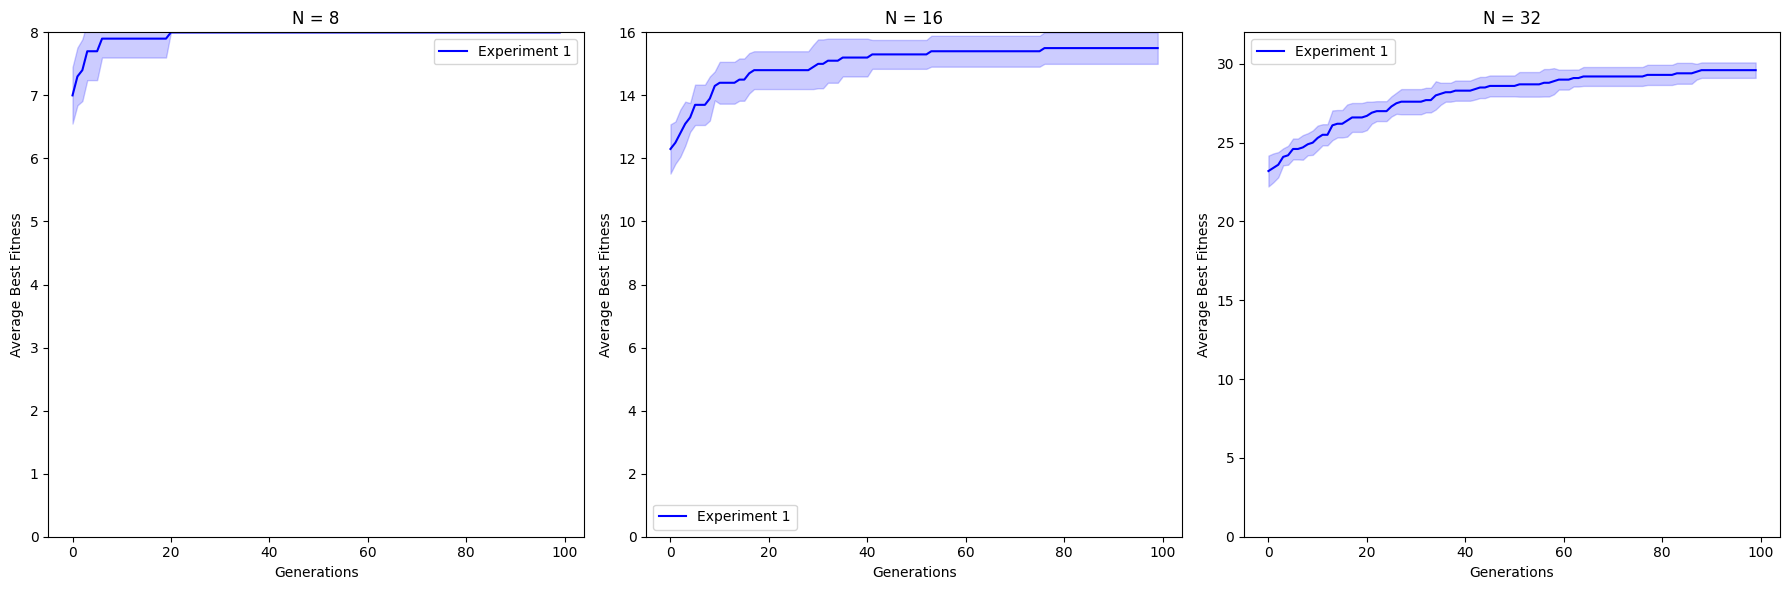

In [208]:
labels = ["N = 8", "N = 16", "N = 32"]

generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2=None,
    stds_experiment_2=None,
    n_columns=3,
    n_queens=[8, 16, 32],
)

### **Question 4 (0-0.4 pt):** 
* Describe the average performance of the algorithm. What was the maximum average fitness found for each case? Do you see any differences between the problem cases?

**Answer**: The maximum average found for the $n=8$ case was the maximum possible number of queens 8. However, for the $n=16$ and $n=32$ case, this maximum average could not be reached, instead remaining at remaining at a suboptimal value of 15 and 29 respectively. This indicates that with 200 generations, the evolutionary algorithm that is created cannot find the optimal solution, and more iterations might be needed. The figures show that $n=8$ case converges within 30 iterations every time towards the average solution, while the $n=16$ and $n=32$ solution do not converge yet, but seem to slightly improve even up to the 200th generation. So the difficulty of the problem cases increases for the algorithm, causing the average fitness to only converge for the smallest problem case $n=8$ at 200 generations, while the $n=16$ and $n=32$ cases do not converge.
